<a href="https://colab.research.google.com/github/itzk-sgh/coblabAlldemo/blob/main/line_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"

data = pd.read_csv(url)
data
# y = w*x + b
x = data["YearsExperience"]
y = data["Salary"]
y

In [ ]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a5b00e38acb373727c5345c5225f352abf919799c6a6a3f26f887994dd444580
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

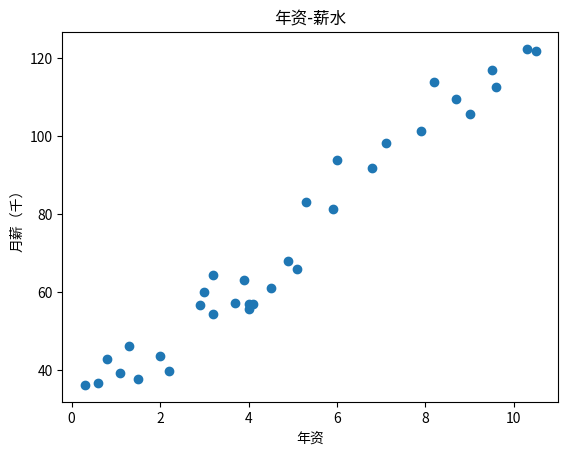

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mlp.rc('font',family="ChineseFont")

# plt.scatter(x,y)
plt.scatter(x,y,marker="x", color="red")
plt.title("年资-薪水")
plt.xlabel("年资")
plt.ylabel("月薪（千）")
plt.show()

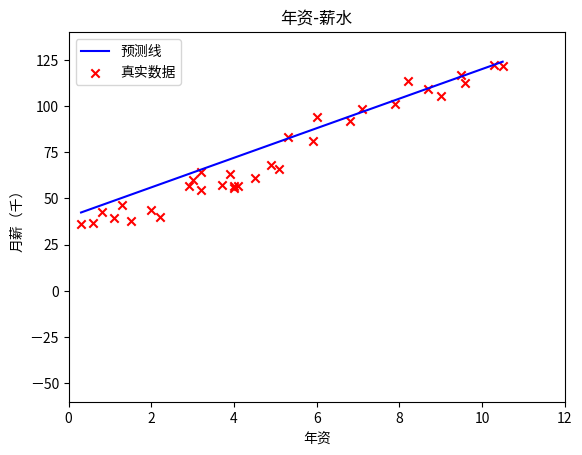

In [ ]:
w = 0
b = 0
def plot_pred(w,b):
  y_pred = x*w + b
  plt.plot(x,y_pred,color="blue",label="预测线")
  # plt.scatter(x,y)
  plt.scatter(x,y,marker="x", color="red",label="真实数据")
  plt.title("年资-薪水")
  plt.xlabel("年资")
  plt.ylabel("月薪（千）")
  plt.xlim([0,12])
  plt.ylim([-60,140])
  plt.legend()
  plt.show()

plot_pred(8,40)

In [ ]:
from ipywidgets import interact
interact(plot_pred,w=(-100,100,1),b=(-100,100,1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

In [ ]:
# 找到最适合资料的直线？
# cost function
w = 10
b = 0

y_pred = w*x + b
cost = (y - y_pred)**2
cost.sum()/ len(x) # 距离平方的平均

19884.080000000005

In [ ]:
def compute_cost(x,y,w,b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum()/ len(x) # 距离平方的平均
  return cost

compute_cost(x,y,10,10)

227.88121212121214

In [ ]:
# b=0 w=-100~100 cost会是多少
costs = []
for w in range(-100,101):
  cost = compute_cost(x,y,w,0)
  costs.append(cost)

costs

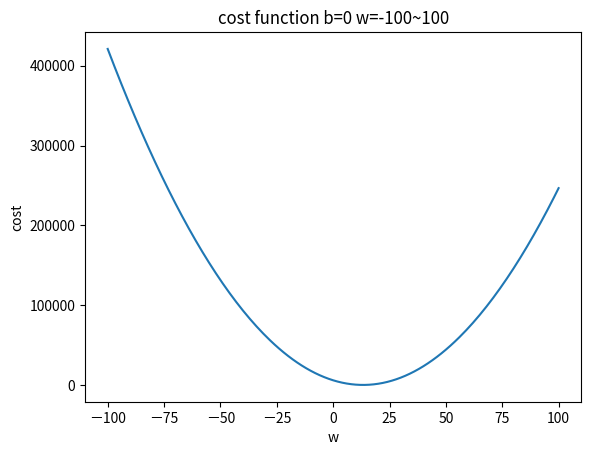

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib as mlp
# from matplotlib.font_manager import fontManager
#
# fontManager.addfont("ChineseFont.ttf")
# mlp.rc('font',family="ChineseFont")


# plt.scatter(range(-100,101),costs)
plt.plot(range(-100,101),costs)
plt.title("cost function b=0 w=-100~100")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

In [ ]:
# b=-100~100 w=-100~100 的 cost
import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201)) # 建一个都是0二维矩阵，存放不同的w和b
i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x,y,w,b)
    costs[i,j] = cost
    j = j+1

  i=i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

In [99]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mlp.rc('font',family="ChineseFont")

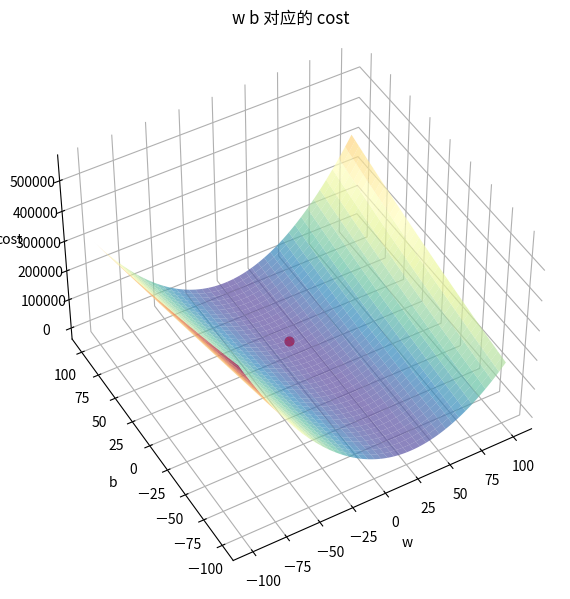

[109] [129]
[9] [29]
当a=[9],b=[29]会有最小的cost: [32.69484848]


In [125]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.view_init(45,-120)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0,1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0,1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0,1.0))

b_grid,w_grid = np.meshgrid(bs,ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
# ax.plot_surface(ws,bs,costs)
ax.plot_surface(w_grid,b_grid,costs,cmap="Spectral_r", alpha=0.7) # cmap 控制颜色 alpha 控制透明度
# ax.plot_wireframe(w_grid,w_grid,costs,color="black",alpha=0.1)

ax.set_title("w b 对应的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index,b_index=np.where(costs == np.min(costs))
ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="red",s=40)

plt.show()

print(w_index,b_index)
print(ws[w_index],bs[b_index])
print(f"当a={ws[w_index]},b={bs[b_index]}会有最小的cost: {costs[w_index,b_index]}")

In [ ]:
# 怎样有效率的找出最佳w b？
# gradient descent 梯度下降 = 根据斜率改变参数
# learning rate 学习率 = 往下走的步伐大小
# 二维曲线
#   往下走的步伐 = w - 斜率 * 学习率
#     学习率大，步伐大，过大可能导致永远走不到最低点
#     学习率小，步伐小，过小可能导致耗时非常久也到不了最低点
# 三维曲线
#   w方向斜率 = 2x（w*x+b-y）
#   b方向斜率 = 2（w*x+b-y）
#   更新w <= w - w方向斜率*学习率
#   更新b <= b - b方向斜率*学习率
w=10
b=10
def compute_gradient(x,y,w,b):
  # w_gradient = 2*x*(w*x+b-y) # 对w做微分-即求斜率
  # b_gradient = 2*(w*x+b-y) # 对w做微分-即求斜率

  # 做平均
  # w_gradient = 2*x*(w*x+b-y).sum()/len(x) # 对w做微分-即求斜率
  # b_gradient = 2*(w*x+b-y).sum()/len(x)  # 对w做微分-即求斜率
  # 注意：下述代码中求梯度省略了一个2，可以通过讲learning_rate * 2调整，效果是一样的。省略2是因为其会间接影响步伐大小，省略后直接用learning_rate控制即可。
  w_gradient = (x*(w*x+b-y)).mean() # 对w做微分-即求斜率 -- 计算斜率/梯度
  b_gradient = (w*x+b-y).mean()   # 对w做微分-即求斜率 -- 计算斜率/梯度
  return w_gradient,b_gradient

compute_gradient(x,y,20,10)

(268.54757575757577, 35.084848484848486)

In [ ]:
def gradient_descent(x,y,w_init,b_init,learning_rate,cost_function,gradient_function,run_iter,p_iter):
  c_hist = []
  w_hist = []
  b_hist = []
  w = w_init
  b = b_init
  for i in range(0,run_iter):
    # w_gradient,b_gradient = compute_gradient(x,y,w,b)
    w_gradient,b_gradient = gradient_function(x,y,w,b)

    w = w - w_gradient * learning_rate
    b = b - b_gradient * learning_rate
    # cost = compute_cost(x,y,w,b)
    cost = cost_function(x,y,w,b)
    c_hist.append(cost)
    w_hist.append(w)
    b_hist.append(b)

    if i % p_iter == 0:
      print(f"Ieration{i:8}: Cost:{cost:8.2f} , w: {w:8.2f} , b: {b:8.2f} , w_gradient: {w_gradient:8.2f}, b_gradient: {b_gradient:8.2f}") # 确认cost是否有下降
      # print(f"Ieration{i:8}: Cost:{cost: .2e} , w: {w: .2e} , b: {b: .2e} , w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")
  return w,b,w_hist,b_hist,c_hist

In [116]:
w_init = -100
b_init = -100
learning_rate = 1.0e-3 # 0.001
run_iter = 20000
p_iter  = 1000
w_final,b_final,w_hist,b_hist,c_hist = gradient_descent(x,y,w_init,b_init,learning_rate,compute_cost,compute_gradient,run_iter,p_iter)

Ieration       0: Cost:507525.40 , w:   -95.80 , b:   -99.34 , w_gradient: -4201.51, b_gradient:  -660.73
Ieration    1000: Cost: 1938.25 , w:    21.67 , b:   -55.55 , w_gradient:     3.35, b_gradient:   -22.31
Ieration    2000: Cost: 1149.87 , w:    18.73 , b:   -35.98 , w_gradient:     2.57, b_gradient:   -17.08
Ieration    3000: Cost:  687.62 , w:    16.48 , b:   -20.99 , w_gradient:     1.96, b_gradient:   -13.08
Ieration    4000: Cost:  416.58 , w:    14.76 , b:    -9.51 , w_gradient:     1.50, b_gradient:   -10.02
Ieration    5000: Cost:  257.66 , w:    13.44 , b:    -0.72 , w_gradient:     1.15, b_gradient:    -7.67
Ieration    6000: Cost:  164.48 , w:    12.43 , b:     6.01 , w_gradient:     0.88, b_gradient:    -5.87
Ieration    7000: Cost:  109.85 , w:    11.65 , b:    11.17 , w_gradient:     0.68, b_gradient:    -4.50
Ieration    8000: Cost:   77.82 , w:    11.06 , b:    15.11 , w_gradient:     0.52, b_gradient:    -3.44
Ieration    9000: Cost:   59.03 , w:    10.61 , b:    

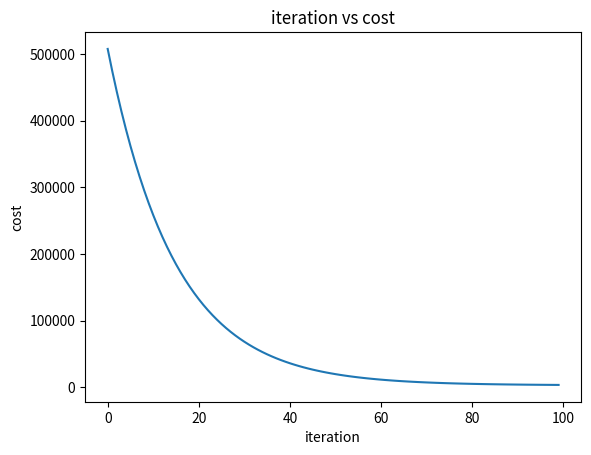

In [117]:
plt.plot(np.arange(0,100),c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [119]:
print(f"最终w b=({w_final:.2f}, {b_final:.2f})")
# 目标：初创公司希望通过年资给应聘者开工资
print(f"年资3.5 预测薪水：{w_final*3.5 + b_final:.1f}K")
print(f"年资5.9 预测薪水：{w_final*5.9 + b_final:.1f}K")

最终w b=(9.20, 27.49)
年资3.5 预测薪水：59.7K
年资5.9 预测薪水：81.8K


In [120]:
ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201)) # 建一个都是0二维矩阵，存放不同的w和b
i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x,y,w,b)
    costs[i,j] = cost
    j = j+1

  i=i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

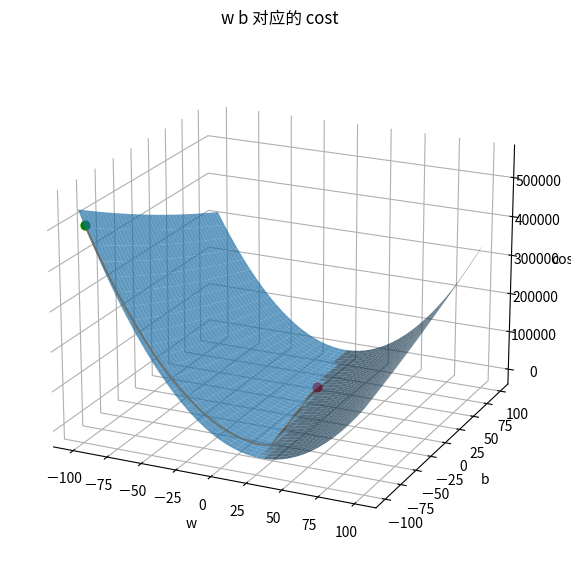

In [126]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.view_init(20,-65)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid,w_grid = np.meshgrid(bs,ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

# ax.plot_surface(ws,bs,costs)
ax.plot_surface(w_grid,b_grid,costs,alpha=0.7) # cmap 控制颜色 alpha 控制透明度
# ax.plot_wireframe(w_grid,w_grid,costs,color="black",alpha=0.1)

ax.set_title("w b 对应的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index,b_index=np.where(costs == np.min(costs))
ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="red",s=40)
ax.scatter(w_hist[0],b_hist[0],c_hist[0],color="green",s=40)

ax.plot(w_hist,b_hist,c_hist)
plt.show()

## 以上就是线性回归的过程